<a href="https://colab.research.google.com/github/shahabrrad/ML_homeworks/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE25737: Introduction to Machine Learning
## Programming assignment 1: python warm-up

### Shahab Rahimirad
### 95104663

Throughout this course we will be using Python for programming assignments.<br> 
Python is a powerful programming language. Python official documentations contain tutorials on basic features of python:  
https://docs.python.org/3/  
Note that you should work with version 3.x of python.  
With the help of libraries, Python becomes a powerful tool for data science.


### NumPy  
NumPy is a powerful package for mathematical computing in Python.  
https://docs.scipy.org/doc/numpy/user/index.html  


### SciPy  
SciPy is built on NumPy and provides a large number of functions that operate on numpy arrays.  
http://docs.scipy.org/doc/scipy/reference/tutorial/general.html  


### Mathplotlib  
Mathplotlib is a powerful and easy to use library for making plots. It will be useful through this course.  
http://matplotlib.org/contents.html  


Aside from official documentations, there are many useful materials on the internet to get started with python and numpy. Some suggestions:  
http://cs231n.github.io/python-numpy-tutorial/  
https://harvard-iacs.github.io/2017-CS109A/labs/lab1/notebook/  


### IPython notebooks  
Assignments will be given in IPython notebook format (like this one).




## NumPy exercises  
In this assignment, you have to implement some functions.  
Complete the codes below. Then run the cell and check your results.


 OK  got:
    array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
 expected:
    array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
 OK  got:
    array([ 0,  1,  2,  3, -4, -5, -6, -7,  8,  9])
 expected:
    [0, 1, 2, 3, -4, -5, -6, -7, 8, 9]
 OK  got: (2, 4, 8, 2) expected: (2, 4, 8, 2)
 OK  got:
    array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23]])
 expected:
    array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23]])
 OK  got:
    array([10, 12, 14, 16])
 expected:
    array([10, 12, 14, 16])


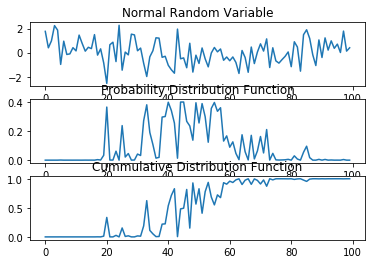

1.31285905838
0.00276398658752


In [ ]:
import numpy as np
from scipy.misc import face
from scipy.stats import norm
import scipy as sp
import matplotlib.pyplot as plt
import timeit
np.random.seed(0)

def one_hot_5_of_10():
    """
    Return a vector of size 10, all zeros but 5th value one
    """
    ### your code here
    vector = np.zeros((10), dtype=int)
    vector[4] = 1
    return vector


def negate_3_to_8(x):
    """
    Given a 1D array, negate all elements which are between 3 and 8
    """
    ### your code here
    return np.where((x>3) & (x<8) ,x*-1,x)


def get_size_properties(x):
    """
    return the following for array x in one tuple:
    (num_rows, num_cols, num_elements, num_dimensions)
    check python documentations for properties of tuples and lists
    """
    ### your code here
    return (np.size(x,0) , np.size(x,1) , np.size(x) , x.ndim)


def append_vector_to_matrix(x, y):
    """
    Append row vector y to the end (bottom) of matrix x.
    return the resulting matrix.
    """
    ### your code here
    return np.vstack((x,y))


def column_sum(x):
    """
    Return a vector containing the sum of each column of matrix x
    """
    ### your code here
    return np.sum(x , 0)


def plot_samples(sample, x):
    """
    Fill in the missing lines to match the titles of the subplots
    """
    plt.figure()

    plt.subplot(3,1,1)
    plt.title('Normal Random Variable')
    plt.plot(sample)

    plt.subplot(3,1,2)
    plt.title('Probability Distribution Function')
    ### your code here, write code to get PDF (hint:NumPy has ready functions for these)
    pdf = norm.pdf(x , sample)
    plt.plot(pdf)

    plt.subplot(3,1,3)
    plt.title('Cummulative Distribution Function')
    ### your code here , write code to get CDF
    cdf = norm.cdf(x , sample)
    plt.plot(cdf)




def test(got, expected):
    """
    Simple provided test() function used in main() to print
    what each function returns vs. what it's supposed to return.
    """
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))


def test_array(got, expected):
    if np.array_equal(got, expected):
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got:\n    %s\n expected:\n    %s' % (prefix, repr(got), repr(expected)))


def mat_mul_naive_python(x, y):
    result = [[0] * len(x)] * len(y[0])
    # iterate through rows of X
    for i in range(len(x)):
        # iterate through columns of Y
        for j in range(len(y[0])):
            # iterate through rows of Y
            for k in range(len(y)):
                result[i][j] += x[i][k] * y[k][j]


# Calls the above functions.
def main():
    # Numpy

    x = np.array([[0, 1, 2, 3],
                 [10, 11, 12, 13]])
    y = np.array([20, 21, 22, 23])
    z = np.arange(10)

    test_array(one_hot_5_of_10(), np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))
    test_array(negate_3_to_8(z), [0, 1, 2, 3, -4, -5, -6, -7, 8, 9])
    test(get_size_properties(x), (2, 4, 8, 2))
    test_array(append_vector_to_matrix(x, y), np.array([[ 0,  1,  2,  3],
                                                        [10, 11, 12, 13],
                                                        [20, 21, 22, 23]]))
    test_array(column_sum(x), np.array([10, 12, 14, 16]))

    
    sample = norm.rvs(size=100)
    x = sp.r_[-5:5:100j]
    plot_samples(sample, x)
    plt.show()
    # Compare the execution speed of matrix multiplication using pure python and using SciPy.
    # only to be impressed by the incredible gap in performance.
    setup1 = \
"""from __main__ import mat_mul_naive_python
from scipy.stats import norm
import numpy as np
X = np.random.random((100, 100))
Y = np.random.random((100, 100))
x_list = X.tolist()
y_list = Y.tolist()"""
    print(timeit.timeit("mat_mul_naive_python(x_list, y_list)", setup=setup1, number=10))

    setup2 = \
"""from scipy.stats import norm
import numpy as np
X = np.random.random((100, 100))
Y = np.random.random((100, 100))
"""
    print(timeit.timeit("np.matmul(X, Y)", setup=setup1, number=10))


if __name__ == '__main__':
    main()


# Pandas, and Matplotlib

## What is pandas?
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional,...) and time series data both easy and intuitive. It is a powerful tool for doing practical, real world data analysis in Python.
Pandas is very useful for interactive data exploration in data science and machine learning projects.

The offical guide to Pandas can be found [here](http://pandas-docs.github.io/pandas-docs-travis/getting_started/10min.html).

## Exercise: Visualizing Iris dataset 


In [ ]:
# Import Pandas
import pandas as pd

#Load data
file_name = "iris.csv"
name = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
iris = pd.read_csv(file_name, sep=",", names=name, header=0)
iris = iris.sample(frac=1).reset_index(drop=True)

In [ ]:
# See the description of data
iris.describe()
### your code here
# See the first few line of data
### your code here
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.3,3.7,1.5,0.2,setosa
1,4.9,3.1,1.5,0.1,setosa
2,7.7,2.6,6.9,2.3,virginica
3,4.6,3.1,1.5,0.2,setosa
4,5.7,4.4,1.5,0.4,setosa


## Now we try to plot Species based on some of feature pairs

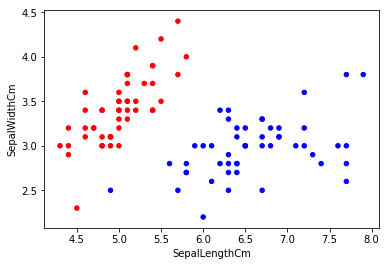

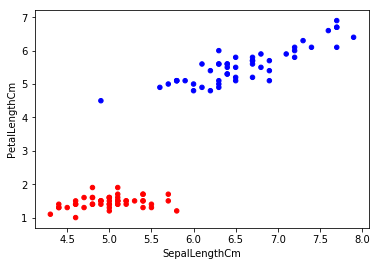

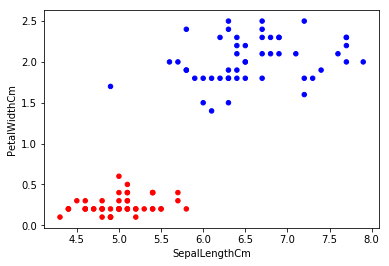

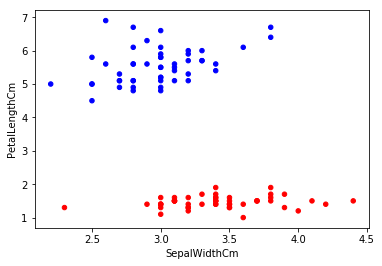

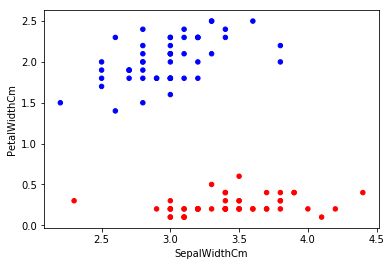

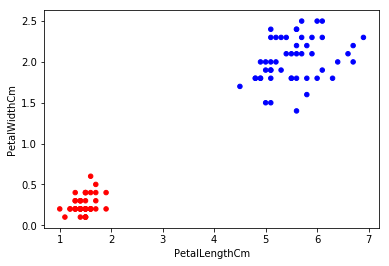

In [ ]:
# creating a scatter plot of "Species" using "SepalLengthCm" and "SepalWidthCm" features 
### your code here
colors = np.where(iris.Species == 'setosa', 'r', 'b')
plot1 = iris.plot.scatter(x='SepalLengthCm', y = 'SepalWidthCm' , c=colors)
# creating a scatter plot of "Species" using "SepalLengthCm" and "PetalLengthCm" features 
### your code here
plot2 = iris.plot.scatter(x='SepalLengthCm', y = 'PetalLengthCm' , c=colors)
# creating a scatter plot of "Species" using "SepalLengthCm" and "PetalWidthCm" features
### your code here
plot3 = iris.plot.scatter(x='SepalLengthCm', y = 'PetalWidthCm' , c=colors)
# creating a scatter plot of "Species" using "SepalWidthCm" and "PetalLengthCm" features 
### your code here
plot4 = iris.plot.scatter(x='SepalWidthCm', y = 'PetalLengthCm' , c=colors)
# creating a scatter plot of "Species" using "SepalWidthCm" and "PetalWidthCm" features 
### your code here
plot5 = iris.plot.scatter(x='SepalWidthCm', y = 'PetalWidthCm' , c=colors)
# creating a scatter plot of "Species" using "PetalLengthCm" and "PetalWidthCm" features 
### your code here1
plot6 = iris.plot.scatter(x='PetalLengthCm', y = 'PetalWidthCm' , c=colors)

Now from your observations above, suggest "features" which can be useful in classifying flowers.

*From the last plot, we can see that there is a huge gap between Iris species regarding the length and the width of their petal. So we should be able to easily distinguish setosa from virginica by looking at their petal length and width. However, where exactly to draw the line is another problem that needs further analysis and possibly, more samples.*





*Other plots also show decent features to classify these flowers however, there is a high variance in the data showing the sepal size. This makes it quite difficult to find a meaningful way to classify samples solely on sepal width or sepal length. We either need information on petal size or the ratio of sepal length to sepal width which still, as seen in the plot, has a high chance of unwanted error due to being less separable.*

## Assignment: Computing Likelihood  
In this exercise you should write a function that computes likelihood of a sample belonging to a normal distribution, given distributions' means and variances.

In [ ]:
from numpy.random import rand, randn

In [ ]:
# don't change this code
n, d, k = 100, 2, 4
np.random.seed(10)
X = rand(n, d) # test points are generated randomly

means = [rand(d)  for _ in range(k)]

S = np.diag(rand(d))

sigmas = [S]*k # for simplicity we made all sigmas equal(but they could be different)

#print(means)
#print(sigmas)

Write estimate_likelihood function which will estimate likelihood. Follow the given formulas.

In [ ]:
def estimate_likelihood(X, mean, sigma):
    ### your code here
    likelihoods = []
    for x in X:
      zarib = ((2*np.pi)*((np.linalg.det(sigma))**0.5))**(-1)
      x_mean = x - mean
      power = x_mean.transpose().dot(np.linalg.inv(sigma))
      power = power.dot(x_mean)
      ans = zarib* np.exp((-0.5)*power)
      likelihoods.append(ans)
    return likelihoods

In [ ]:
P = [estimate_likelihood(X, m, s) for m, s in zip(means, sigmas)] # likelihoods of all points according to each of distributions
#print(P)

4


### Prediction: 
According to likelihoods you estimated, assign each point to the distribution it is most likely from.

In [ ]:
### your code here
positioning = []
for i in range(100):
  max_like = np.argmax([P[j][i] for j in range(4)])
  positioning.append(max_like)
#print(positioning)

### Plotting  
Plot the test points.  
Separate your predictions using colors.(i.e. show all points that are likely to be from distribution 1 with red...)  
also show the mean point of each distribution.

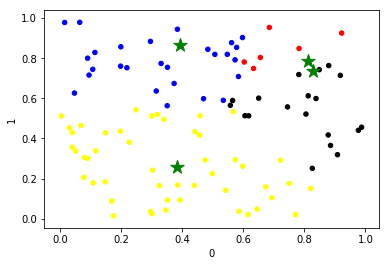

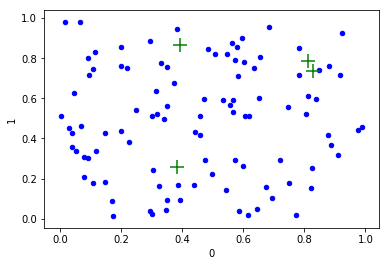

In [ ]:
### your code here
positioning = np.array(positioning)
colors = np.where(positioning == 0, 'r' , positioning)
colors = np.where(colors == '1', 'b' , colors)
colors = np.where(colors == '2', 'yellow' , colors)
colors = np.where(colors == '3', 'k' , colors)
#print(colors)
arr = np.array(X)

df = pd.DataFrame(arr)
plot1 = df.plot.scatter(x=0, y = 1 , c=colors)
means = np.array(means)
means = pd.DataFrame(means)
plot2=means.plot.scatter(x=0, y = 1 , marker='*' , s = 200 , ax=plot1 , c='green')


#before classification
plotbefore = df.plot.scatter(x=0 , y=1 , c = 'b')
plot2before=means.plot.scatter(x=0, y = 1 , marker='+' , s = 200 , ax=plotbefore , c='green')
